# 🧠 **Handwritten Digit Recognition with Neural Networks**

Learn how computers can recognize numbers like humans do!

In this project, we’ll build a **Neural Network** that can look at handwritten digits (0–9) and guess which number it is. This is like teaching a computer how to read messy handwriting.
<br>

**Why does this matter in the real world? Well here are just some examples:**
<br>

* 📱 Your phone uses similar technology to read your handwriting or unlock with face recognition.

* 🚗 Self-driving cars use CNNs to read road signs.



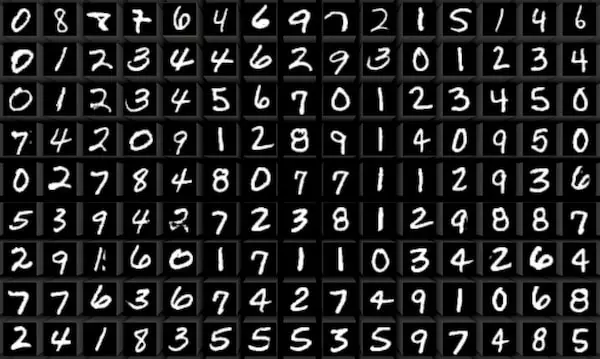

## Step 1: Import the Tools
* **tensorflow / keras** → lets us build and train neural networks (like LEGO blocks for AI).

* **matplotlib** → used for drawing pictures (graphs, images).

* **numpy** → helps us do math with arrays (like a super calculator).

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Load the MNIST Dataset
* **MNIST dataset** = 70,000 pictures of handwritten digits (0–9).

* `x_train` = images used to teach the model (training).

* `y_train` = the correct labels for those images.

* `x_test`, `y_test` = images and labels used to test the model after training.

In [ ]:
# The dataset is already split into:
#   - Training data: (X_train, y_train) used to train the model
#   - Test data: (X_test, y_test) used to evaluate the model after training
import tensorflow as tf
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Check the shape (dimensions) of the test data
print( X_test.shape)

# Check the shape (dimensions) of the training data
print(y_test.shape)

(10000, 28, 28)
(10000,)


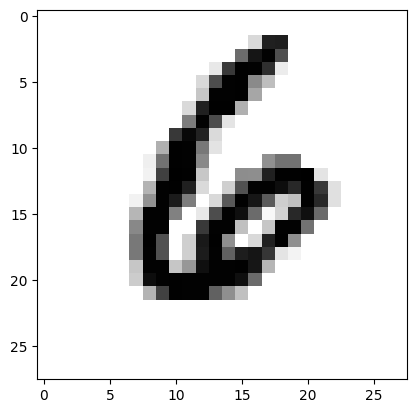

In [ ]:
# Show the 14th image in the training dataset (index 13, since Python starts at 0)
# plt.imshow() displays an image
# X_train[13] means we are selecting one image from the training set
# cmap=plt.cm.binary shows the image in black and white instead of color
plt.imshow(X_train[13],cmap=plt.cm.binary)


# Step 3: Prepare the Data
* Images are 28×28 pixels.

* `.reshape(...,1)` → adds a “color channel” (grayscale).

* `/ 255.0` → scales values to between 0 and 1 (easier for the computer brain to learn).


In [ ]:
# Reshape and normalize the images for the model

# .reshape(-1, 28, 28, 1):
#   - The -1 keeps the number of images the same (60,000 for train, 10,000 for test)
#   - 28, 28 are the height and width of each image
#   - 1 means there is 1 color channel (grayscale)

# .astype("float32"):
#   - Converts the pixel values into 32-bit floating point numbers (needed for training)

# / 255.0:
#   - Normalizes pixel values from 0–255 to 0–1
#   - This helps the neural network train faster and more accurately

X_train = X_train.reshape(-1,28,28,1).astype("float32") / 255.0
X_test  = X_test.reshape(-1,28,28,1).astype("float32") / 255.0



# Step 4: Build the Neural Network Model
Think of this like a recipe for our model:

1. **Input Layer** → expects 28×28 pixel grayscale images.  
   (Tells the model what kind of data is coming in.)  

2. **Flatten Layer** → unrolls the 28×28 image into a 1D list of 784 numbers.  
   (Like laying out all the pixels in a straight line.)  

3. **Dense (Fully Connected Layers)** → the “thinking” layers that learn patterns.  
   * First dense layer: 128 neurons with ReLU → learns simple features.  
   * Second dense layer: 64 neurons with ReLU → combines those features into deeper patterns.  

4. **Output Layer (Dense with 10 neurons + Softmax)** → one neuron for each digit (0–9).  
   (Softmax turns the outputs into probabilities, so the model can “guess” the most likely digit.)  

In [ ]:
# Build a simple Neural Network using Keras Sequential API
model = models.Sequential([

    # Input layer: expect images of size 28x28 with 1 channel (grayscale)
    layers.Input(shape=(28,28,1)),

    # Flatten layer: convert the 28x28 image into a 1D vector of 784 numbers
    # (neural networks usually work with 1D inputs)
    layers.Flatten(),

    # First hidden layer: 128 neurons, ReLU activation
    # ReLU introduces non-linearity so the network can learn complex patterns
    layers.Dense(128, activation='relu'),

    # Second hidden layer: 64 neurons, also with ReLU
    # Adds more learning capacity to the model
    layers.Dense(64, activation='relu'),

    # Output layer: 10 neurons (one for each digit 0–9)
    # Softmax activation converts outputs into probabilities that sum to 1
    layers.Dense(10, activation='softmax')
])

# Step 5: Compile the Model
* `optimizer (adam)` → tells the model how to improve itself step by step.

* `loss` → measures how wrong the predictions are.

* `metrics` → what we want to track (here: accuracy).

In [ ]:
# Set up how the model will learn and measure performance

# optimizer='adam'
#   - Adam is a popular algorithm that adjusts the model’s weights to reduce errors
#   - Think of it like a smart teacher helping the model learn faster and better

# loss='sparse_categorical_crossentropy'
#   - This measures how far the model's predictions are from the true labels
#   - Sparse version is used because our labels are integers (0–9) instead of one-hot vectors

# metrics=['accuracy']
#   - We want to track accuracy: how often the model’s predictions match the true labels
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])




# Step 6: Train the Model
* `epochs=5` → go through the entire dataset 5 times.

* `batch_size=64` → train on 64 images at a time.

* `validation_split=0.1` → keeps 10% of training data aside to check progress.

In [ ]:
# Train the model using the training data

# X_train, y_train → the input images and their correct labels
# epochs=5 → the model will go through the entire training set 5 times
# batch_size=64 → the model looks at 64 images at a time before updating its weights
# validation_split=0.1 → 10% of the training data is set aside to check how well the model is learning

# The model.fit() function returns a "history" object that keeps track of:
#   - training loss and accuracy
#   - validation loss and accuracy

history = model.fit(X_train, y_train, epochs=5, batch_size=64,
                    validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8495 - loss: 0.5145 - val_accuracy: 0.9603 - val_loss: 0.1317
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9602 - loss: 0.1275 - val_accuracy: 0.9750 - val_loss: 0.0873
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9739 - loss: 0.0821 - val_accuracy: 0.9755 - val_loss: 0.0786
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9819 - loss: 0.0606 - val_accuracy: 0.9772 - val_loss: 0.0754
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9871 - loss: 0.0440 - val_accuracy: 0.9793 - val_loss: 0.0747


# Step 7: Evaluate the Model
* Tests the model on new data (it hasn’t seen before).

* Prints out accuracy (how many digits it guessed correctly).

In [ ]:
# X_test, y_test → the input images and their correct labels for testing
# verbose=2 → shows a simple progress log while evaluating

# model.evaluate() returns:
#   - test_loss → how far off the model's predictions are on the test data
#   - test_acc  → the accuracy of the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
# Print the test accuracy as a decimal with 4 digits
print("Test accuracy", test_acc)

313/313 - 2s - 5ms/step - accuracy: 0.9773 - loss: 0.0739
Test accuracy 0.9772999882698059


# Step 8: Make a Prediction
* Pick one image from the test set.

* Ask the model to guess the digit.

* Compare prediction with the actual answer.

In [ ]:
# Take a single test image to make a prediction
# X_test[13] → select the 14th image from the test set
# .reshape(1,28,28,1) → reshape it into the format the model expects

sample = X_test[13].reshape(1,28,28,1)  # prepare the image

# model.predict(sample) → returns probabilities for each digit (0–9)
# np.argmax(...) → picks the digit with the highest probability as the predicted digit

prediction = np.argmax(model.predict(sample))

# Print both the predicted digit and the actual digit

print("Predicted digit:",prediction,"Actual digit:",y_test[13])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
Predicted digit: 0 Actual digit: 0


#Step 9: Show the Image
* Displays the digit the model guessed.

* You can see what digit the computer looked at and whether it was right.

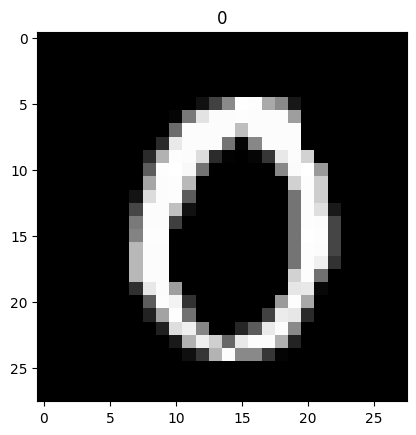

In [ ]:
# Display the test image we just made a prediction on
# X_test[13].reshape(28,28) → reshape the image back to 28x28 pixels for visualization
# cmap="gray" → show the image in grayscale
# plt.title(...) → show the model's predicted digit above the image
# plt.show() → display the image in the notebook

plt.imshow(X_test[13].reshape(28,28), cmap="gray")
plt.title(prediction)
plt.show()